# A/B тест на языке Python

Данные для тестирования были взяты с сайта [Kaggle](https://www.kaggle.com/datasets/adarsh0806/ab-testing-practice/data).\
Датасет представляет собой синтетический набор данных о поведении пользователей несуществующего сайта. Автор датасета разделил пользователей на две группы: у пользователей группы A цвет фона сайта белый, а у пользователей группы B - чёрный.\
В данном A/B тесте будет проверено, влияет ли цвет фона сайта на поведение пользователей.

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from scipy.stats import chi2_contingency
init_notebook_mode(connected = True)

In [2]:
ab_data = pd.read_csv('ab_testing.csv')

In [3]:
ab_data.head()

,User ID,Group,Page Views,Time Spent,Conversion,Device,Location
0,14292,B,3,424,No,Mobile,Northern Ireland
1,11682,A,9,342,No,Mobile,Scotland
2,19825,A,2,396,No,Desktop,Northern Ireland
3,16080,B,4,318,No,Desktop,Wales
4,18851,A,1,338,Yes,Desktop,Scotland


Датасет состоит из таблицы, в которую уже включены данные обеих исследовательских групп. Представлена информация о количестве просмотренных пользователем страниц, проведенном времени на сайте, выполнении конверсии, устройстве, с которого совершалось посещение, и стране, где находился пользователь.

Проверю, есть ли в датасете пропуски в данных.

In [4]:
ab_data.isnull().sum()

User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64

Далее проверю, есть ли в датасете дубликаты.

In [5]:
ab_data.duplicated().sum()

0

Пропусков в данных и дубликатов нет. Проверю, сколько пользователей относится к каждой из групп.

In [6]:
ab_data['Group'].value_counts()

Group
A    2519
B    2481
Name: count, dtype: int64

В группах разное количество пользователей, но разность невелика относительно количества пользователей в одной группе.\
Далее проверю, в какой группе выше процент выполнения конверсии.

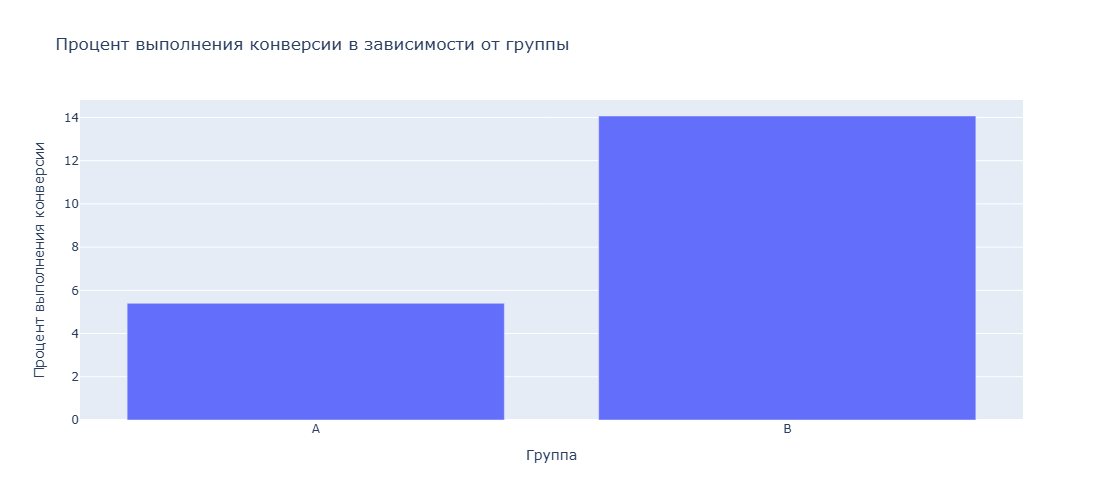

In [15]:
groups = ['A','B']
values = [100 * sum((ab_data['Conversion'] == 'Yes') & (ab_data['Group'] == 'A'))/sum(ab_data['Group'] == 'A'),
          100 * sum((ab_data['Conversion'] == 'Yes') & (ab_data['Group'] == 'B'))/sum(ab_data['Group'] == 'B')]
fig = px.bar(x = groups,
                y = values,
                labels={'x':'Группа', 'y':'Процент выполнения конверсии'},
                title = 'Процент выполнения конверсии в зависимости от группы',
                height = 500)
fig.show()

Видно, что в групп B процент выполнения конверсии заметно выше.\
Далее проверю, что могло повлиять на процент выполнения конверсии помимо принадлежности к конкретной группе.

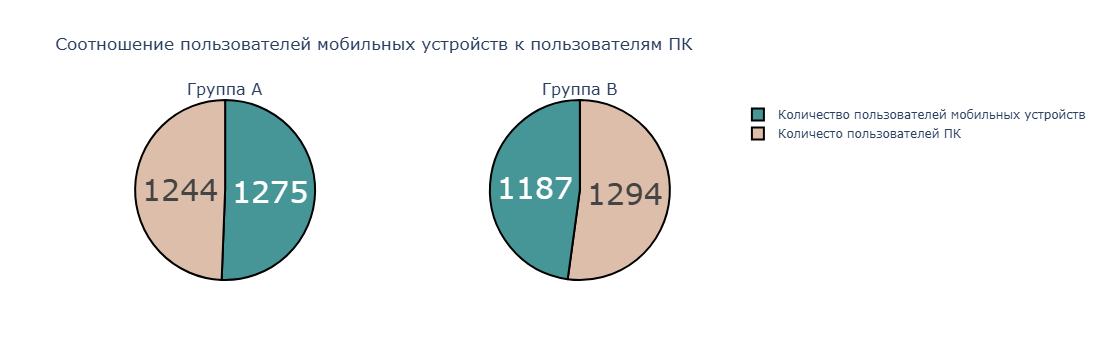

In [16]:
label = ['Количество пользователей мобильных устройств', 
         'Количесто пользователей ПК']
counts_A = [sum((ab_data['Device'] == 'Mobile')  & (ab_data['Group'] == 'A')), 
          sum((ab_data['Device'] == 'Desktop')  & (ab_data['Group'] == 'A'))]
counts_B = [sum((ab_data['Device'] == 'Mobile')  & (ab_data['Group'] == 'B')), 
          sum((ab_data['Device'] == 'Desktop')  & (ab_data['Group'] == 'B'))]
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]],  subplot_titles=('Группа A','Группа B'))
fig.add_trace(go.Pie(labels=label, values=counts_A), 1, 1)
fig.add_trace(go.Pie(labels=label, values=counts_B), 1, 2)
colors = ['#469597','#DDBEAA']
fig.update_layout(title_text='Соотношение пользователей мобильных устройств к пользователям ПК')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=2)))
fig.show()

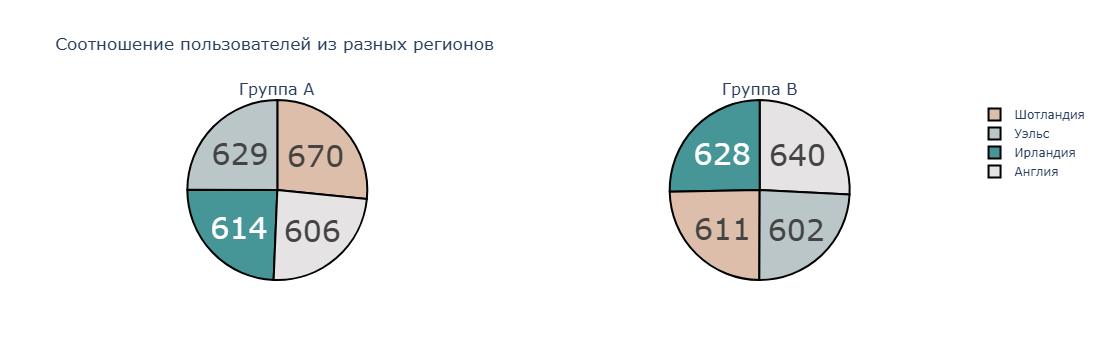

In [17]:
label = ['Ирландия', 
         'Шотландия',
         'Уэльс',
         'Англия']
counts_A = [sum((ab_data['Location'] == 'Northern Ireland')  & (ab_data['Group'] == 'A')), 
          sum((ab_data['Location'] == 'Scotland')  & (ab_data['Group'] == 'A')),
           sum((ab_data['Location'] == 'Wales')  & (ab_data['Group'] == 'A')),
           sum((ab_data['Location'] == 'England')  & (ab_data['Group'] == 'A'))]
counts_B = [sum((ab_data['Location'] == 'Northern Ireland')  & (ab_data['Group'] == 'B')), 
          sum((ab_data['Location'] == 'Scotland')  & (ab_data['Group'] == 'B')),
           sum((ab_data['Location'] == 'Wales')  & (ab_data['Group'] == 'B')),
           sum((ab_data['Location'] == 'England')  & (ab_data['Group'] == 'B'))]
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]],  subplot_titles=('Группа A','Группа B'))
fig.add_trace(go.Pie(labels=label, values=counts_A), 1, 1)
fig.add_trace(go.Pie(labels=label, values=counts_B), 1, 2)
colors = ['#469597','#DDBEAA','#BBC6C8','#E5E3E4']
fig.update_layout(title_text='Соотношение пользователей из разных регионов')
fig.update_traces(hoverinfo='label+percent', textinfo='value', 
                  textfont_size=30,
                  marker=dict(colors=colors, 
                              line=dict(color='black', width=2)))
fig.show()

Распределение пользователей внутри групп в зависимости от их устройства и расположения примерно одинаковые.

Проверю отличаются ли проведенное на сайте время и количество просмотренных страниц в зависимости от группы.

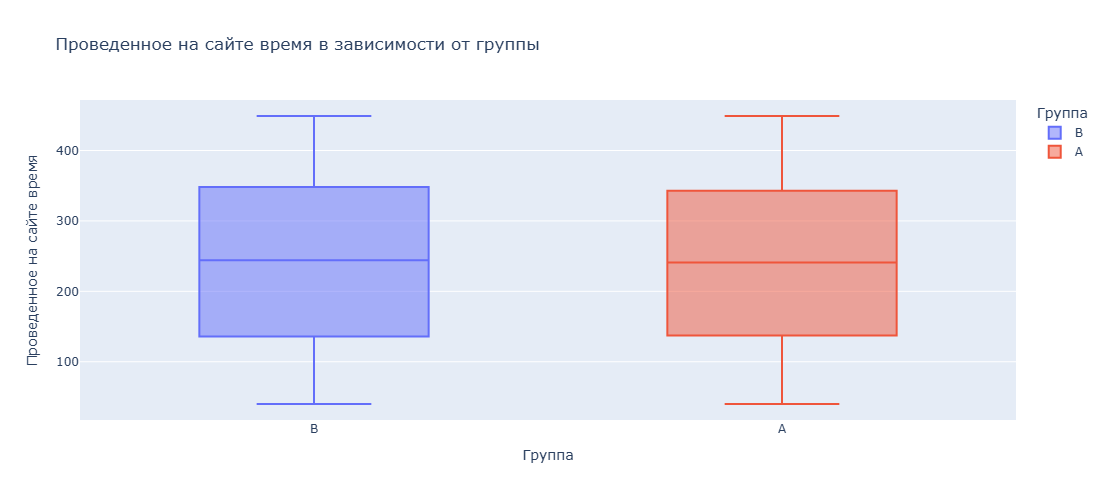

In [18]:
fig = px.box(ab_data,
             x='Group',
             y='Time Spent',
             color = 'Group',
             title = 'Проведенное на сайте время в зависимости от группы',
             labels={'Group':'Группа', 'Time Spent':'Проведенное на сайте время'},
             height = 500)
fig.show()

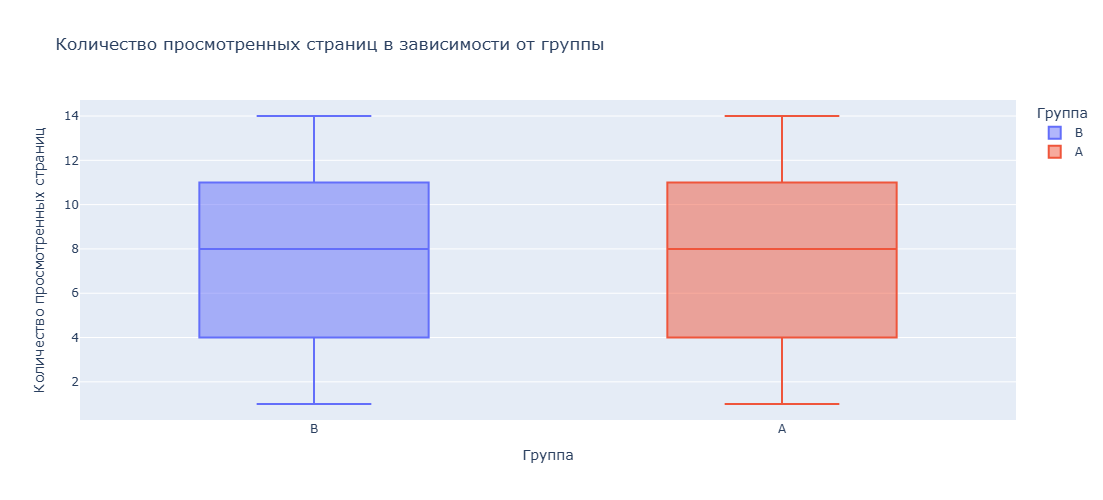

In [19]:
fig = px.box(ab_data,
             x='Group',
             y='Page Views',
             color = 'Group',
             title = 'Количество просмотренных страниц в зависимости от группы',
             labels={'Group':'Группа', 'Page Views':'Количество просмотренных страниц'},
             height = 500)
fig.show()

Различия есть, но незначительные.

In [12]:
conversion_true = ab_data.loc[ab_data['Conversion'] == 'Yes']
pivot = conversion_true.pivot_table(values = 'Conversion', index = 'Group', columns = ['Device', 'Location'], aggfunc = 'count')

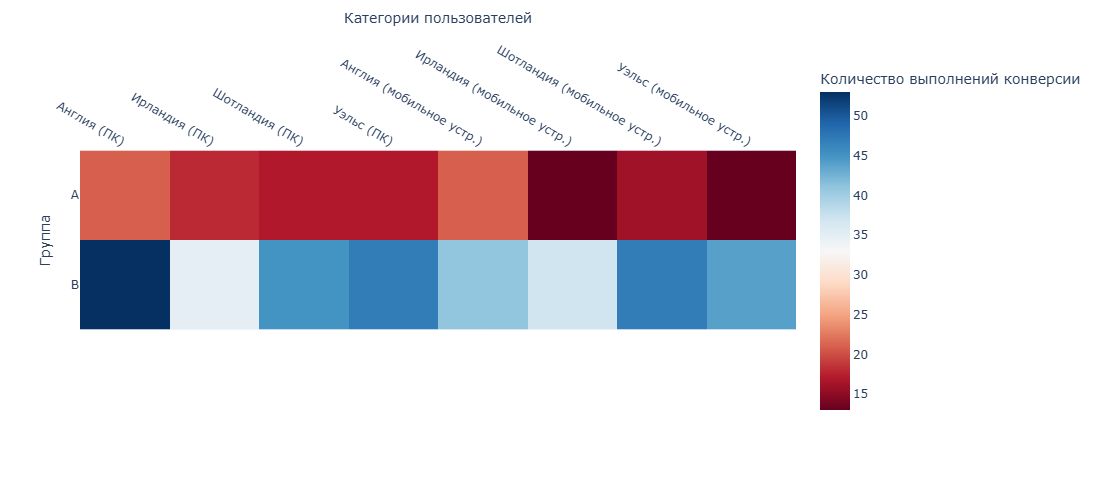

In [20]:
fig = px.imshow(pivot,
                labels=dict(x="Категории пользователей", y="Группа", color="Количество выполнений конверсии"),
                x=['Англия (ПК)', 'Ирландия (ПК)', 'Шотландия (ПК)', 'Уэльс (ПК)',
                  'Англия (мобильное устр.)', 'Ирландия (мобильное устр.)', 'Шотландия (мобильное устр.)', 'Уэльс (мобильное устр.)'],
                color_continuous_scale = px.colors.diverging.RdBu,
                height = 500)
fig.update_xaxes(side="top")
fig.show()

Можно заметить, что вне зависимости от расположения и устройства, конверсию чаще выполняют пользователи группы B.

Далее проведу хи-квадрат тест для проверки следующих гипотез:\
H0. Выполнение конверсии не зависит от группы\
H1. Выполнение конверсии зависит от группы

In [14]:
contingency = pd.crosstab(ab_data['Group'], ab_data['Conversion'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f'Chi-square: {chi2}, p_value: {p}')

Chi-square: 106.22812337440538, p_value: 6.571736018334222e-25


P-value меньше 0.05, что значит отклонение нулевой гипотезы - выполнение конверсии зависит от группы.

В результате тестов сделать вывод о том, что цвет фона влияет на выполнение конверсии (пользователи группы B показали лучший результат) и почти не влияет на количество просмотренных страниц и проведенное на сайте время.\
Если целью изменения фона является повышение выполнения конверсии, то следует изменить цвет фона на чёрный. Если же цель - увеличение числа просмотренных страниц и проведенного на сайте времени, то изменение цвета фона не даст заметных результатов.